## 1 - Configuração do Ambiente

#### O notebook começa com a importação das bibliotecas necessárias e configuração do ambiente de trabalho.



In [1]:
import torch
import torchvision
import sys

# Add src directory to sys.path so imports work
import os
sys.path.insert(0, os.path.abspath('src'))

import src.vcpi_util as vcpi_util
from src.constants import device, BATCH_SIZE, WORKERS, PREFETCH
from src.transformations import test_transform, train_transform, train_transform_advanced, train_transform_aggressive, train_transform_basic, train_transform_color, train_transform_geometric

print(f'Using device: {device}')

Using device: cuda:0


## 2 - Configurações de Data Augmentation

    • train_transform_basic: Transformações básicas como redimensionamento e normalização

    • train_transform_geometric: Transformações geométricas como rotação, translação e zoom

    • train_transform_color: Transformações de cor como brilho, contraste e saturação

    • train_transform_aggressive: Combinação intensiva de transformações geométricas e de cor

    • train_transform_advanced: Transformações avançadas com probabilidades ajustadas



In [2]:
augmentation_configs = {
    'default': train_transform,
    'basic': train_transform_basic,
    'geometric': train_transform_geometric,
    'color': train_transform_color,
    'aggressive': train_transform_aggressive,
    'advanced': train_transform_advanced
}

## 3 - Carregamento e Exploração dos Dado

#### O notebook carrega o dataset GTSRB e exibe informações sobre o mesmo.

    • Número de amostras de treino: 35347

    • Número de amostras de teste: 12630

    • Número de classes: 43

    • Lista das classes (IDs dos sinais de trânsito)



/home/franc/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 16, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Number of training samples: 35347
Number of test samples: 12630
Number of classes: 43
Classes: ['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042']


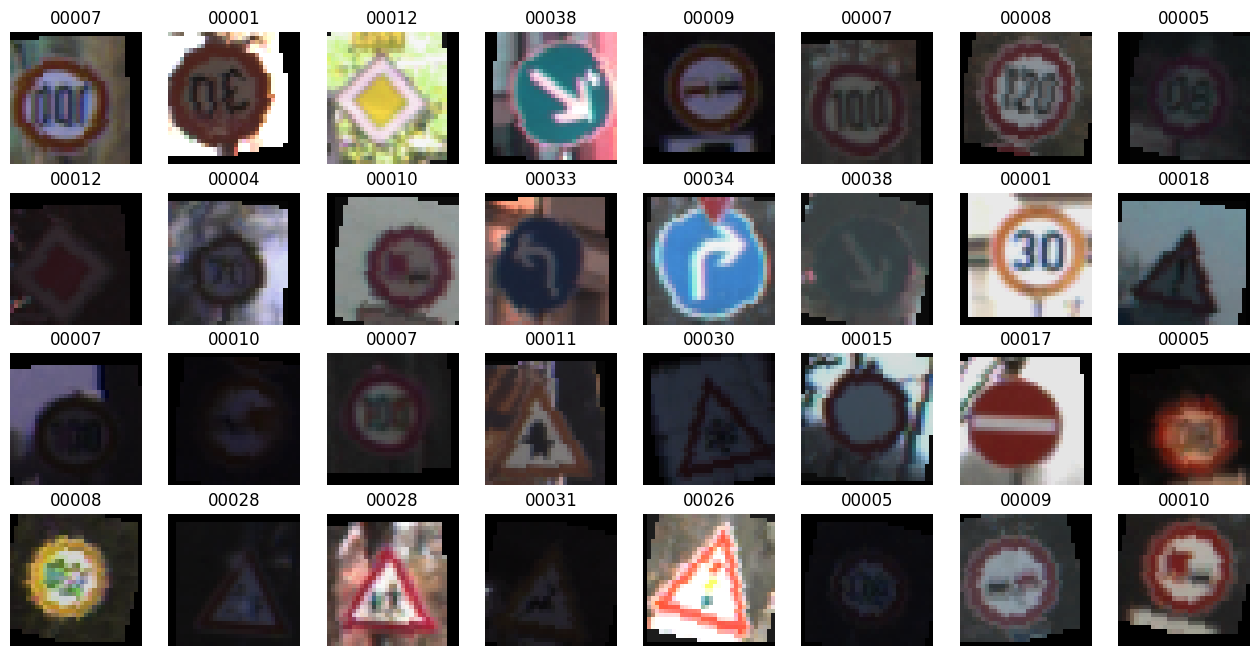

<Figure size 640x480 with 0 Axes>

In [3]:
# Load dataset with augmentations
data_path = 'data/'  # Path to the data folder

# Load training dataset with augmentation
train_dataset = torchvision.datasets.ImageFolder(
    root=data_path + 'train_images',
    transform=train_transform
)
train_loader = torch.utils.data.DataLoader(
    train_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True,
    num_workers=WORKERS,
    pin_memory=True,
    prefetch_factor=PREFETCH,
    persistent_workers=True
)

# Load test dataset
test_dataset = torchvision.datasets.ImageFolder(
    root=data_path + 'test_images',
    transform=test_transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    num_workers=WORKERS,
    pin_memory=True,
    prefetch_factor=PREFETCH,
    persistent_workers=True
)

# Print dataset information
print(f'Number of training samples: {len(train_dataset)}')
print(f'Number of test samples: {len(test_dataset)}')
print(f'Number of classes: {len(train_dataset.classes)}')
print(f'Classes: {train_dataset.classes}')

# Display a few training images
images, labels = next(iter(train_loader))

vcpi_util.show_images(4, 8, images, labels, train_dataset.classes)

## 4 - Visualização de Imagens

Função auxiliar para visualizar o efeito do data augmentation aplicado às imagens do dataset GTSRB. Esta função pode ser utilizada para verificar como as transformações afetam as imagens antes de treinar os modelos.

In [4]:
# Carregar imagens com uma transformação específica
def load_images(transformation_name='default'):
    # Criar datasets com a augmentation atual
    dataset = torchvision.datasets.ImageFolder(
        root=data_path + 'train_images',
        transform=augmentation_configs[transformation_name]
    )

    # Criar DataLoaders
    loader = torch.utils.data.DataLoader(
        dataset,
        batch_size=BATCH_SIZE, 
        shuffle=True,
        num_workers=WORKERS,
        pin_memory=True,
        prefetch_factor=PREFETCH,
        persistent_workers=True
    )
    return dataset, loader

 **Default** |
---

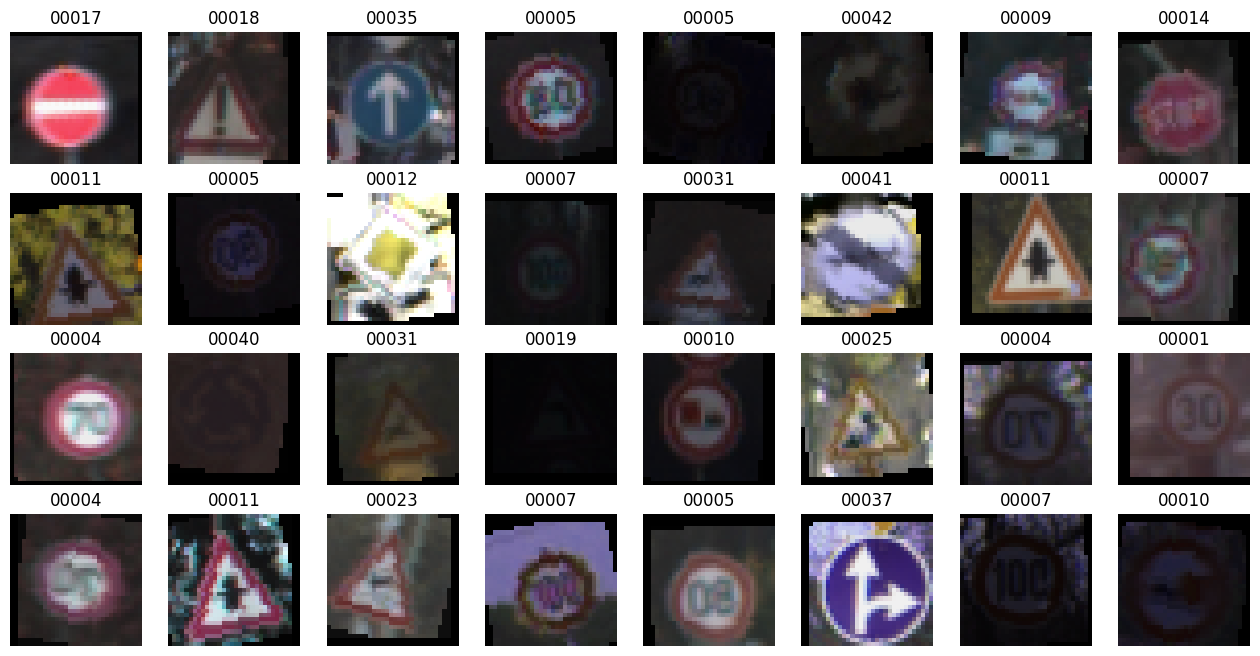

<Figure size 640x480 with 0 Axes>

In [5]:
dataset, loader = load_images("default")
images, labels = next(iter(loader))
vcpi_util.show_images(4, 8, images, labels, dataset.classes)

**Basic**|
---

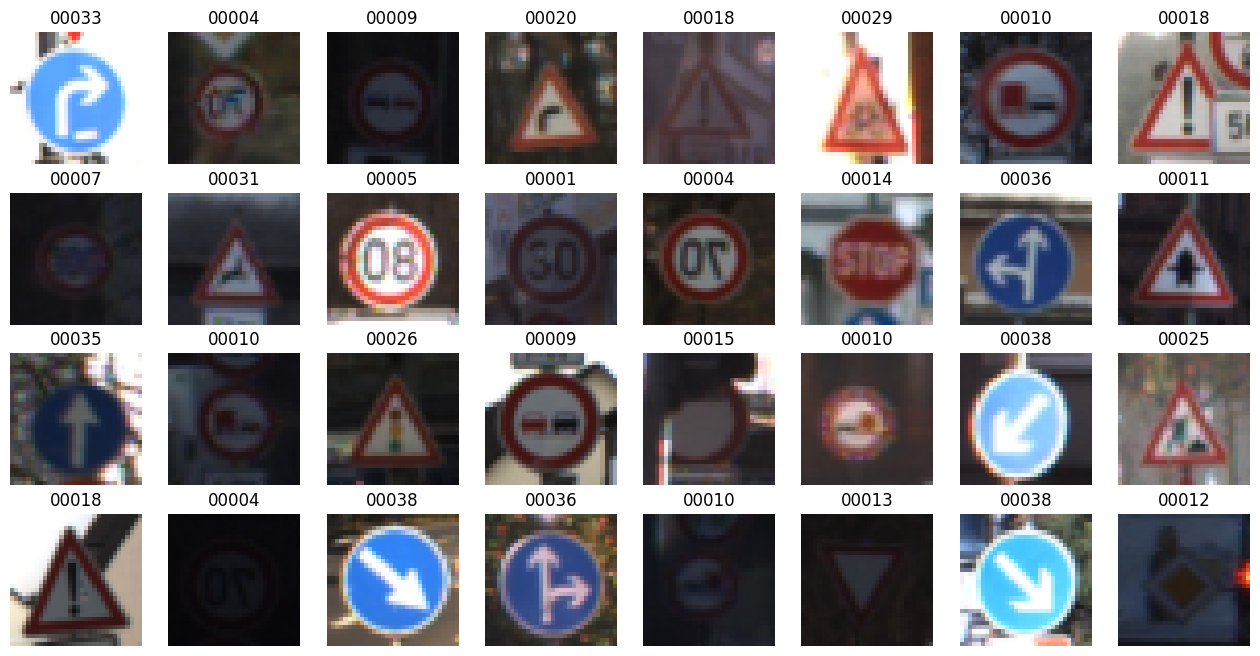

<Figure size 640x480 with 0 Axes>

In [6]:
dataset, loader = load_images("basic")
images, labels = next(iter(loader))
vcpi_util.show_images(4, 8, images, labels, dataset.classes)

**Geometric**|
---

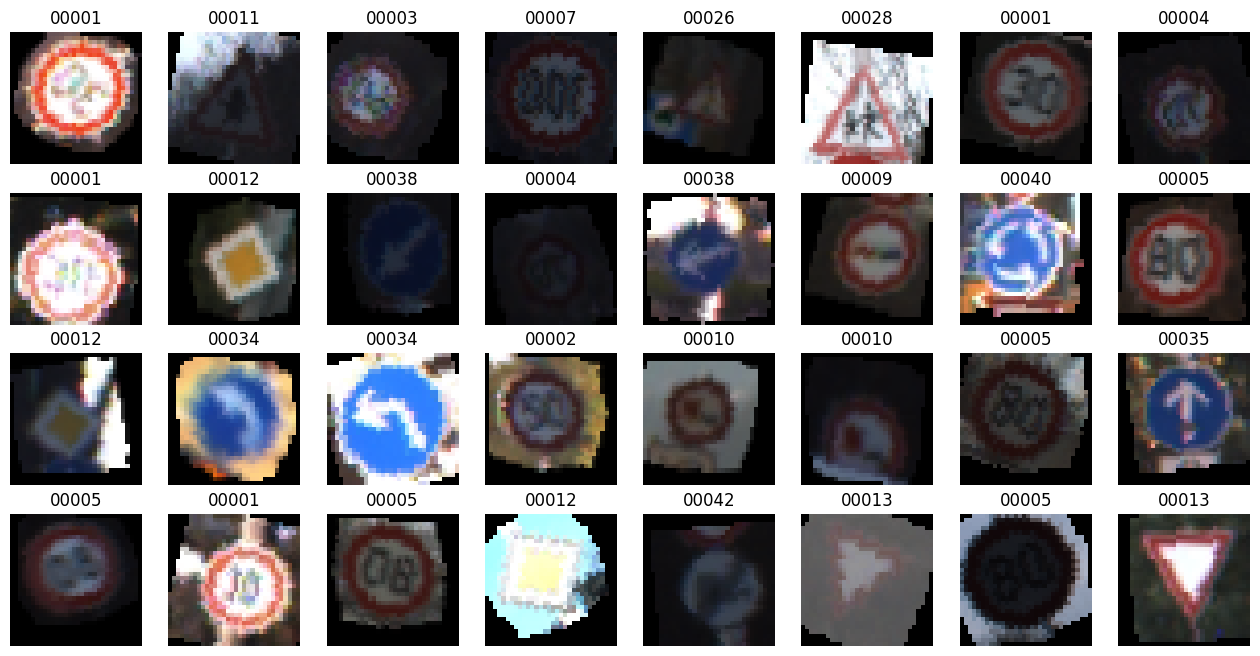

<Figure size 640x480 with 0 Axes>

In [7]:
dataset, loader = load_images("geometric")
images, labels = next(iter(loader))
vcpi_util.show_images(4, 8, images, labels, dataset.classes)

**Color**|
---

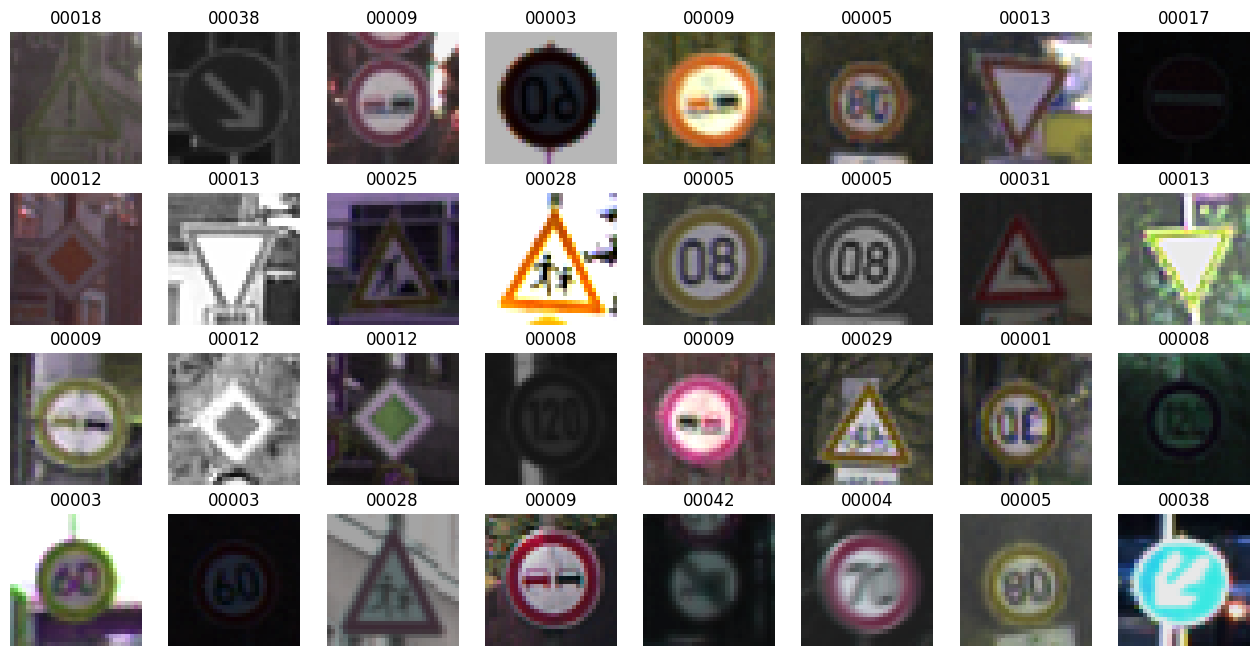

<Figure size 640x480 with 0 Axes>

In [8]:
dataset, loader = load_images("color")
images, labels = next(iter(loader))
vcpi_util.show_images(4, 8, images, labels, dataset.classes)

**Agressive**|
---

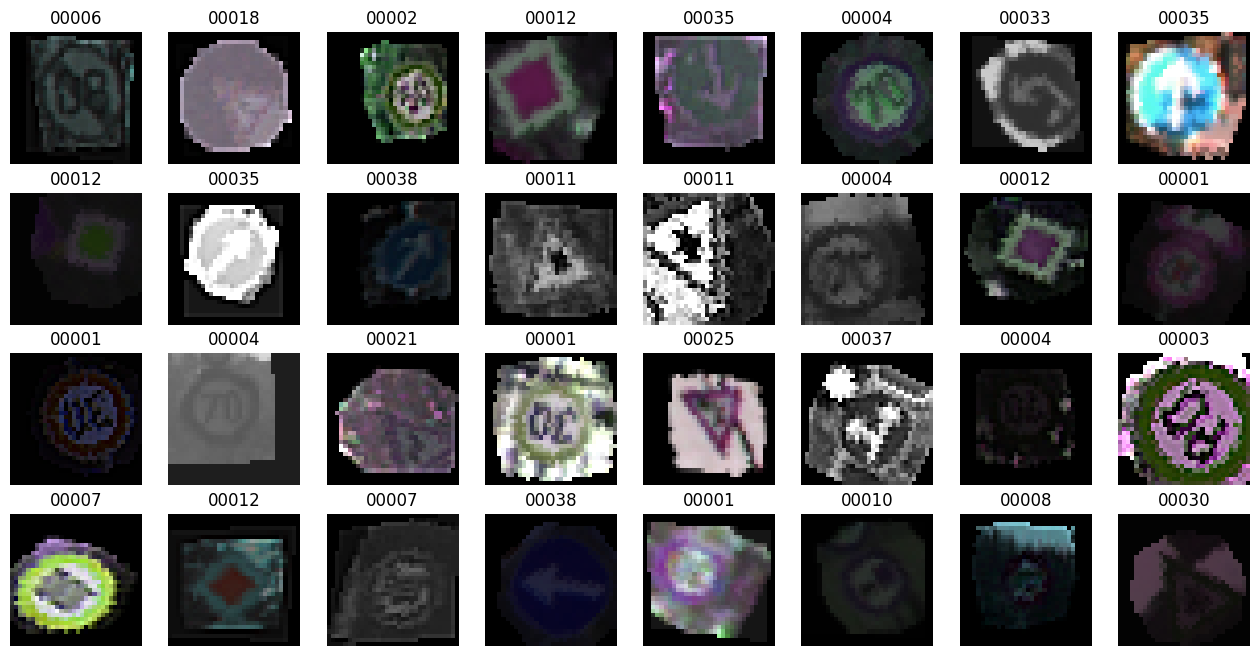

<Figure size 640x480 with 0 Axes>

In [9]:
dataset, loader = load_images("aggressive")
images, labels = next(iter(loader))
vcpi_util.show_images(4, 8, images, labels, dataset.classes)

**Advanced**|
---

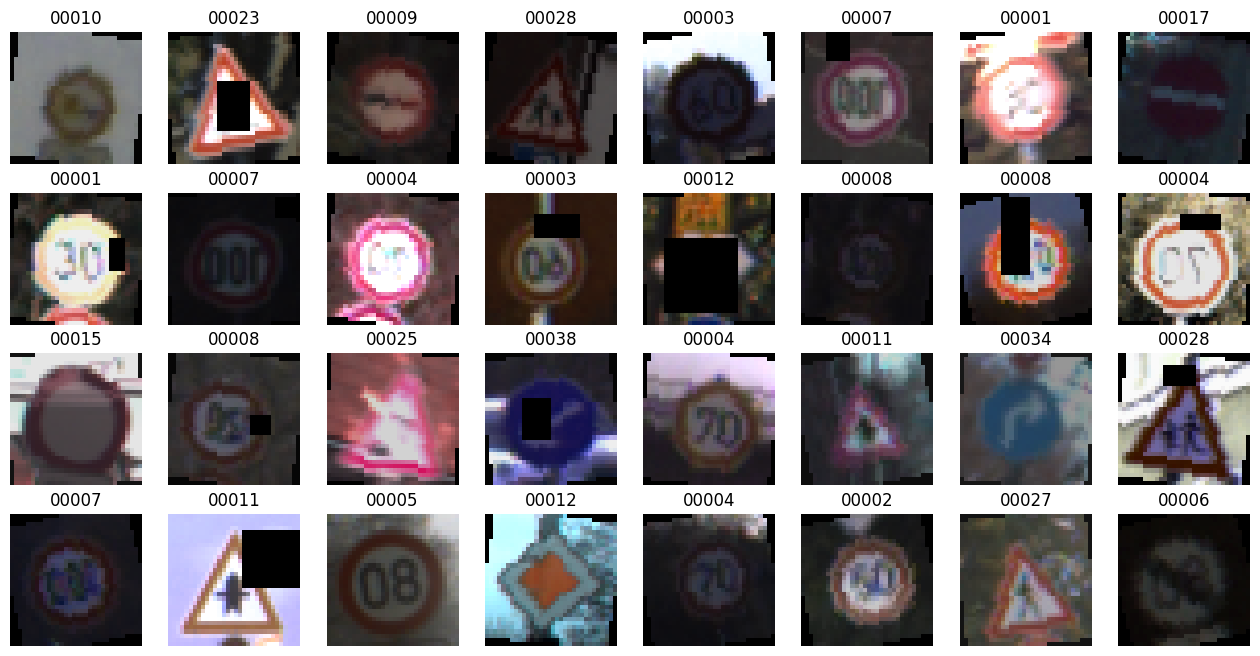

<Figure size 640x480 with 0 Axes>

In [10]:
dataset, loader = load_images("advanced")
images, labels = next(iter(loader))
vcpi_util.show_images(4, 8, images, labels, dataset.classes)